In [27]:
#import necessary libraries and functions
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [28]:
#initialize dataframe for saving the accuracies into csv file
df = pd.DataFrame({'90%': [],
                    '80%': [],
                    '70%': [],
                    '60%': [],
                    '50%': []})

In [29]:
#Load dataset
crops = pd.read_csv('input/Crop_recommendation.csv')

print(crops)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [41]:
X=crops[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # input values
Y=crops['label']  # output
print(crops.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [52]:
#list for accuracies
estimator_accuracies = []
estimators_used = []
# Split dataset into training set and test set after shuffling it
test_train_ratio = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
#test fabdin firest classifier with different amount of estimators (1-20)
for n in range(1, 21):
    print("\nNumber of estimators = {}".format(n))
    #Create a Gaussian Classifier with n estimators
    clf=RandomForestClassifier(n_estimators=n, random_state=0)
    #Train the model using the training sets
    clf.fit(X_train,y_train)
    #predict outputs using testing data
    y_pred=clf.predict(X_test)
    print("-> Accuracy:",metrics.accuracy_score(y_test, y_pred))
    estimator_accuracies.append(metrics.accuracy_score(y_test, y_pred))
    estimators_used.append(n)


Number of estimators = 1
-> Accuracy: 0.9218181818181819

Number of estimators = 2
-> Accuracy: 0.9454545454545454

Number of estimators = 3
-> Accuracy: 0.9781818181818182

Number of estimators = 4
-> Accuracy: 0.9890909090909091

Number of estimators = 5
-> Accuracy: 0.9872727272727273

Number of estimators = 6
-> Accuracy: 0.990909090909091

Number of estimators = 7
-> Accuracy: 0.9890909090909091

Number of estimators = 8
-> Accuracy: 0.9890909090909091

Number of estimators = 9
-> Accuracy: 0.990909090909091

Number of estimators = 10
-> Accuracy: 0.9927272727272727

Number of estimators = 11
-> Accuracy: 0.9890909090909091

Number of estimators = 12
-> Accuracy: 0.9890909090909091

Number of estimators = 13
-> Accuracy: 0.990909090909091

Number of estimators = 14
-> Accuracy: 0.990909090909091

Number of estimators = 15
-> Accuracy: 0.990909090909091

Number of estimators = 16
-> Accuracy: 0.9927272727272727

Number of estimators = 17
-> Accuracy: 0.990909090909091

Number of e

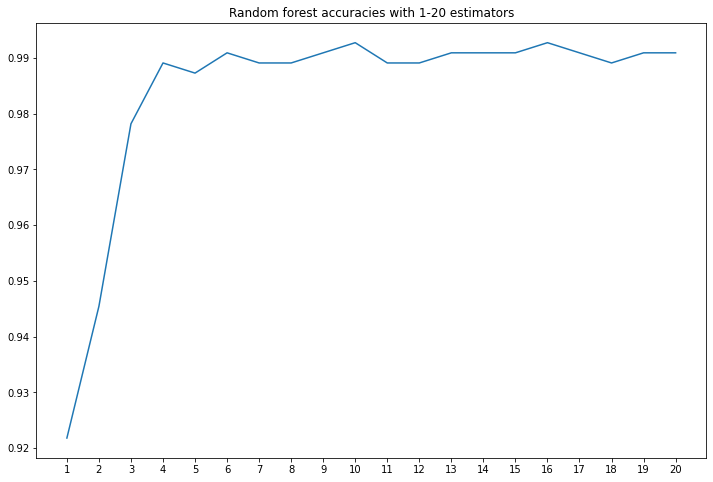

In [53]:
#plot accuracies
fig = plt.figure(figsize=(12,8))
plt.plot(estimators_used, estimator_accuracies)
plt.title('Random forest accuracies with 1-20 estimators') 
plt.xticks(estimators_used)
plt.show()

In [44]:
#list for accuracies
accuracies = []
#test random forest with five different test/train data ratios, repeat 10 times
for i in range(1,6):
        #calculate ratio
        test_train_ratio = float(10*i / 100)
        print("\nTest data: {}%".format(100*test_train_ratio))

        # Split dataset into training set and test set after shuffling it
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)

        #Create a Gaussian Classifier
        clf=RandomForestClassifier(n_estimators=8, random_state=0)

        #Train the model using the training sets
        clf.fit(X_train,y_train)

        #predict outputs using testing data
        y_pred=clf.predict(X_test)
        print("-> Accuracy:",metrics.accuracy_score(y_test, y_pred))
        print(classification_report(y_test,y_pred))
        accuracies.append(metrics.accuracy_score(y_test, y_pred))



Test data: 10.0%
-> Accuracy: 0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00         9
   blackgram       1.00      1.00      1.00        10
    chickpea       1.00      1.00      1.00        11
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        10
      cotton       1.00      1.00      1.00        14
      grapes       1.00      1.00      1.00         8
        jute       0.88      1.00      0.93         7
 kidneybeans       1.00      1.00      1.00         8
      lentil       1.00      1.00      1.00         8
       maize       1.00      1.00      1.00        12
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      1.00      1.00        12
    mungbean       1.00      1.00      1.00        14
   muskmelon       1.00      1.00      1.00         8
      orange       1.00      1.

In [45]:
# calculate, how many times output was predicted correctly with testing data
for i in range(1,6):
    test_train_ratio = float((100 - 10*i) / 100)
    print("Test data: {}%, accuracy: {}".format(100 * test_train_ratio, accuracies[i-1]))

Test data: 90.0%, accuracy: 0.9954545454545455
Test data: 80.0%, accuracy: 0.990909090909091
Test data: 70.0%, accuracy: 0.9924242424242424
Test data: 60.0%, accuracy: 0.9886363636363636
Test data: 50.0%, accuracy: 0.9890909090909091


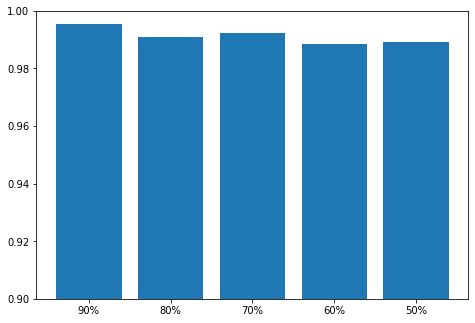

In [46]:
#display accuracies
fig = plt.figure()
plt.title('Accuracies')
ax = fig.add_axes([0,0,1,1])
ratios = ['90%', '80%', '70%', '60%', '50%']
ax.bar(ratios,accuracies)
ax.set_ylim([0.9, 1.0])
plt.show()

In [47]:
#add new results to dataframe, repeat this 10 times
df.loc[len(df.index)] = [accuracies[0], accuracies[1], accuracies[2], accuracies[3], accuracies[4]]
print(df)

        90%       80%       70%       60%       50%
0  0.990909  0.995455  0.987879  0.994318  0.988182
1  0.990909  0.995455  0.989394  0.989773  0.994545
2  0.990909  1.000000  0.995455  0.993182  0.986364
3  0.995455  0.997727  0.990909  0.989773  0.983636
4  0.986364  0.995455  0.993939  0.990909  0.987273
5  0.995455  0.995455  0.989394  0.994318  0.985455
6  0.995455  0.995455  0.992424  0.981818  0.986364
7  1.000000  0.995455  0.989394  0.994318  0.980000
8  0.986364  0.990909  0.993939  0.990909  0.990000
9  0.995455  0.990909  0.992424  0.988636  0.989091


In [48]:
#save latest dataframe to csv file
#df.to_csv('input/rfc_accuracies.csv', index=False, mode='w')